In [21]:
import os

from PIL import Image
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as data
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import random
import matplotlib.pyplot as plt

SEED = 309
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')
    
BATCH_SIZE = 64

class CustomImageDataset(data.Dataset):
    def __init__(self, paths, invalid_lists, transform=None):
        self.images = []
        self.labels = []
        self.transform = transform

        # Loop through each path and its corresponding invalid list
        for idx, (path, invalid_list) in enumerate(zip(paths, invalid_lists)):
            for image_file in os.listdir(path):
                if image_file in invalid_list:
                    continue
                image = Image.open(os.path.join(path, image_file))
                if not invalid_image(image):
                    if self.transform:
                        image = self.transform(image)
                    self.images.append(image)
                    self.labels.append(idx)  # Assign label based on index

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

cherry_path = 'train_data/cherry'
strawberry_path = 'train_data/strawberry'
tomato_path = 'train_data/tomato'

cherries_invalid = [
    'cherry_0022.jpg', 'cherry_0113.jpg', 'cherry_0187.jpg', 'cherry_0257.jpg',
    'cherry_0310.jpg', 'cherry_0318.jpg', 'cherry_0366.jpg', 'cherry_0368.jpg',
    'cherry_0768.jpg', 'cherry_0843.jpg', 'cherry_0873.jpg', 'cherry_1005.jpg',
    'cherry_1017.jpg', 'cherry_1019.jpg', 'cherry_1020.jpg', 'cherry_1057.jpg',
    'cherry_1066.jpg', 'cherry_1297.jpg', 'cherry_1315.jpg', 'cherry_1357.jpg',
    'cherry_1359.jpg', 'cherry_1384.jpg', 'cherry_1424.jpg', 'cherry_1499.jpg',
    'cherry_1556.jpg', 'cherry_1691.jpg', 'cherry_1760.jpg', 'cherry_1801.jpg',
    'cherry_1842.jpg', 'cherry_2012.jpg', 'cherry_2049.jpg', 'cherry_2182.jpg',
    'cherry_2184.jpg', 'cherry_2190.jpg', 'cherry_2264.jpg', 'cherry_2265.jpg',
    'cherry_2299.jpg', 'cherry_2348.jpg'
]


strawberries_invalid = [
    'strawberry_0004.jpg', 'strawberry_0028.jpg', 'strawberry_0035.jpg', 
    'strawberry_0045.jpg', 'strawberry_0046.jpg', 'strawberry_0082.jpg', 
    'strawberry_0083.jpg', 'strawberry_0084.jpg', 'strawberry_0087.jpg', 
    'strawberry_0092.jpg', 'strawberry_0146.jpg', 'strawberry_0178.jpg', 
    'strawberry_0179.jpg', 'strawberry_0181.jpg', 'strawberry_0190.jpg', 
    'strawberry_0239.jpg', 'strawberry_0246.jpg', 'strawberry_0261.jpg', 
    'strawberry_0296.jpg', 'strawberry_0350.jpg', 'strawberry_0385.jpg', 
    'strawberry_0388.jpg', 'strawberry_0389.jpg', 'strawberry_0390.jpg', 
    'strawberry_0403.jpg', 'strawberry_0488.jpg', 'strawberry_0491.jpg', 
    'strawberry_0497.jpg', 'strawberry_0504.jpg', 'strawberry_0571.jpg', 
    'strawberry_0592.jpg', 'strawberry_0627.jpg', 'strawberry_0657.jpg', 
    'strawberry_0662.jpg', 'strawberry_0754.jpg', 'strawberry_0857.jpg', 
    'strawberry_0931.jpg', 'strawberry_1023.jpg', 'strawberry_1052.jpg', 
    'strawberry_1055.jpg', 'strawberry_1089.jpg', 'strawberry_1154.jpg', 
    'strawberry_1161.jpg', 'strawberry_1175.jpg', 'strawberry_1189.jpg', 
    'strawberry_1192.jpg', 'strawberry_1225.jpg', 'strawberry_1298.jpg', 
    'strawberry_1323.jpg', 'strawberry_1342.jpg', 'strawberry_1343.jpg', 
    'strawberry_1350.jpg', 'strawberry_1393.jpg', 'strawberry_1405.jpg', 
    'strawberry_1478.jpg', 'strawberry_1488.jpg', 'strawberry_1513.jpg', 
    'strawberry_1523.jpg', 'strawberry_1541.jpg', 'strawberry_1547.jpg', 
    'strawberry_1553.jpg', 'strawberry_1560.jpg', 'strawberry_1606.jpg', 
    'strawberry_1624.jpg', 'strawberry_1642.jpg', 'strawberry_1660.jpg', 
    'strawberry_1665.jpg', 'strawberry_1715.jpg', 'strawberry_1733.jpg', 
    'strawberry_1738.jpg', 'strawberry_1781.jpg', 'strawberry_1819.jpg', 
    'strawberry_1820.jpg', 'strawberry_1839.jpg', 'strawberry_1843.jpg', 
    'strawberry_1853.jpg', 'strawberry_1876.jpg', 'strawberry_1895.jpg', 
    'strawberry_1941.jpg', 'strawberry_1993.jpg', 'strawberry_2108.jpg', 
    'strawberry_2146.jpg'
]


tomatoes_invalid = [
    'tomato_0091.jpg', 'tomato_0092.jpg', 'tomato_0113.jpg', 'tomato_0147.jpg', 
    'tomato_0153.jpg', 'tomato_0154.jpg', 'tomato_0155.jpg', 'tomato_0156.jpg', 
    'tomato_0157.jpg', 'tomato_0160.jpg', 'tomato_0228.jpg', 'tomato_0265.jpg', 
    'tomato_0282.jpg', 'tomato_0347.jpg', 'tomato_0359.jpg', 'tomato_0411.jpg', 
    'tomato_0412.jpg', 'tomato_0413.jpg', 'tomato_0433.jpg', 'tomato_0463.jpg', 
    'tomato_0496.jpg', 'tomato_0500.jpg', 'tomato_0516.jpg', 'tomato_0562.jpg', 
    'tomato_0580.jpg', 'tomato_0646.jpg', 'tomato_1158.jpg', 'tomato_1188.jpg', 
    'tomato_1260.jpg', 'tomato_1264.jpg', 'tomato_1281.jpg', 'tomato_1284.jpg', 
    'tomato_1285.jpg', 'tomato_1301.jpg', 'tomato_1448.jpg', 'tomato_1502.jpg', 
    'tomato_1520.jpg', 'tomato_1535.jpg', 'tomato_1536.jpg', 'tomato_1568.jpg', 
    'tomato_1617.jpg', 'tomato_1670.jpg', 'tomato_1687.jpg', 'tomato_1746.jpg', 
    'tomato_1831.jpg', 'tomato_1957.jpg', 'tomato_1958.jpg', 'tomato_1959.jpg', 
    'tomato_1960.jpg'
]

paths = [cherry_path, strawberry_path, tomato_path]
invalid_lists = [cherries_invalid, strawberries_invalid, tomatoes_invalid]

def invalid_image(image: Image) -> bool:
    return not (image.size == (300, 300) and image.mode == 'RGB')

def transform_image(image: Image) -> Image:
    return image.resize((300, 300)).convert('RGB')

def load_images_remove_invalid(path, invalid_list):
    images = []
    for image_file in os.listdir(path):
        if image_file in invalid_list:
            continue
        image = Image.open(os.path.join(path, image_file))
        if invalid_image(image):
            image = transform_image(image)
        images.append(image)
    return images

# Load the images, skipping invalid ones
cherry_images = load_images_remove_invalid(cherry_path, cherries_invalid)
strawberry_images = load_images_remove_invalid(strawberry_path, strawberries_invalid)
tomato_images = load_images_remove_invalid(tomato_path, tomatoes_invalid)

transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(), # Convert the image to a PyTorch tensor of smaller size to reduece memory usage
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #ImageNet training dataset mean and standard deviation
])

dataset_all = datasets.ImageFolder(root='train_data', transform=transform)

dataset_pre_processed = CustomImageDataset(paths, invalid_lists, transform=transform)


print(f"Number of images without pre-processing: {len(dataset_all)}")
print(f"Number of images with pre-processing: {len(dataset_pre_processed)}")

Number of images without pre-processing: 4485
Number of images with pre-processing: 4309


In [22]:
print("Length of cherry training data: ",len(cherry_images))
print("Length of strawberry training data: ",len(strawberry_images))
print("Length of tomato training data: ",len(tomato_images))

Length of cherry training data:  1457
Length of strawberry training data:  1414
Length of tomato training data:  1446


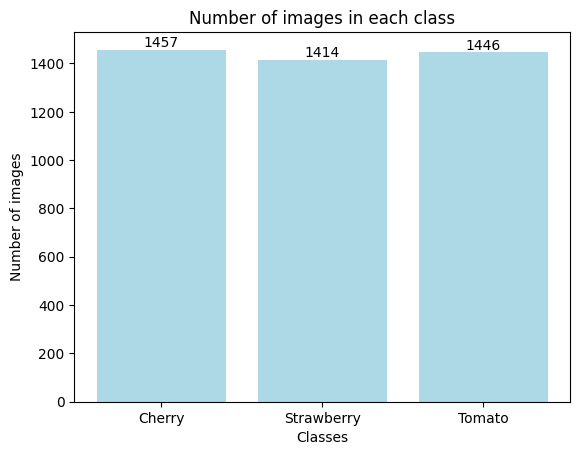

Number of images lost after removing invalid images and outliers:  38
Number of images lost after removing invalid images and outliers:  81
Number of images lost after removing invalid images and outliers:  49


In [23]:
labels = ['Cherry', 'Strawberry', 'Tomato']
sizes = [len(cherry_images), len(strawberry_images), len(tomato_images)]

plt.bar(labels, sizes, color='lightblue')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title('Number of images in each class')

for i, size in enumerate(sizes):
    plt.text(i, size, str(size), ha='center', va='bottom')

plt.show()

for size in sizes:
    print("Number of images lost after removing invalid images and outliers: ", 1495 - size)

In [24]:

train_data_all, test_data_all = data.random_split(dataset_all, [0.8,0.2])
train_data, test_data = data.random_split(dataset_pre_processed, [0.8,0.2])

print(f"Number of training examples: {len(train_data)}")
print(f"Number of validation examples: {len(test_data)}")

Number of training examples: 3448
Number of validation examples: 861


In [25]:
train_loader_all = data.DataLoader(train_data_all, shuffle=True, batch_size=BATCH_SIZE)
test_loader_all = data.DataLoader(test_data_all, batch_size=BATCH_SIZE)

train_loader = data.DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE)
test_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE)

In [26]:
INPUT_LAYER = 100 * 100 * 3 # 100x100 image with 3 channels (RGB)
HIDDEN_LAYER = 1000
OUTPUT_LAYER = 100

MLP = nn.Sequential(
    nn.Flatten(),
    nn.Linear(INPUT_LAYER, HIDDEN_LAYER),
    nn.Linear(HIDDEN_LAYER, OUTPUT_LAYER),
    nn.Linear(OUTPUT_LAYER, 3) # Output layer (3 classes) 
)

MLP = MLP.to(device)

In [27]:
num_samples = 1000
X = torch.randn(num_samples, INPUT_LAYER).to(device)  # Random input features
y = torch.randint(0, OUTPUT_LAYER, (num_samples,)).to(device)  # Random class labels

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(MLP.parameters(), lr=0.001)



def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total


test_set_scores = []
train_set_scores = []

num_epochs = 10  # Number of epochs
for epoch in range(num_epochs):
    MLP.train()
    loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        # Forward pass
        outputs = MLP(inputs)
        
        # Calculate loss
        loss = criterion(outputs, targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Backpropagate the loss
        optimizer.step()       # Update weights
    
    train_set_acc = evaluate(MLP, train_loader)
    test_set_acc = evaluate(MLP, test_loader)


    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
    print(f"Test Set Accuracy: {test_set_acc*100:.2f}%")
    print(f"Train Set Accuracy: {train_set_acc*100:.2f}%")
    test_set_scores.append(test_set_acc)
    train_set_scores.append(train_set_acc)



Epoch [1/10], Loss: 1.1053
Test Set Accuracy: 41.23%
Train Set Accuracy: 44.37%
Epoch [2/10], Loss: 1.1346
Test Set Accuracy: 46.57%
Train Set Accuracy: 54.00%
Epoch [3/10], Loss: 1.0262
Test Set Accuracy: 45.64%
Train Set Accuracy: 52.26%
Epoch [4/10], Loss: 1.0123
Test Set Accuracy: 46.46%
Train Set Accuracy: 57.13%
Epoch [5/10], Loss: 0.9705
Test Set Accuracy: 48.08%
Train Set Accuracy: 60.32%
Epoch [6/10], Loss: 1.0836
Test Set Accuracy: 46.34%
Train Set Accuracy: 57.69%
Epoch [7/10], Loss: 1.0998
Test Set Accuracy: 45.53%
Train Set Accuracy: 64.88%
Epoch [8/10], Loss: 0.9528
Test Set Accuracy: 45.06%
Train Set Accuracy: 63.23%
Epoch [9/10], Loss: 0.9548
Test Set Accuracy: 46.69%
Train Set Accuracy: 68.85%
Epoch [10/10], Loss: 0.8514
Test Set Accuracy: 39.72%
Train Set Accuracy: 57.45%


In [28]:
test_set_scores_all = []
train_set_scores_all = []

for epoch in range(num_epochs):
    MLP.train()
    loss = 0

    print("WITHOUT PREPROCESSING\n -------------------")

    for inputs, targets in train_loader_all:
        inputs, targets = inputs.to(device), targets.to(device)
        # Forward pass
        outputs = MLP(inputs)
        
        # Calculate loss
        loss = criterion(outputs, targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Backpropagate the loss
        optimizer.step()       # Update weights
    
    train_set_acc = evaluate(MLP, train_loader_all)
    test_set_acc = evaluate(MLP, test_loader_all)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
    print(f"Test Set Accuracy: {test_set_acc*100:.2f}%")
    print(f"Train Set Accuracy: {train_set_acc*100:.2f}%")
    test_set_scores_all.append(test_set_acc)
    train_set_scores_all.append(train_set_acc)

WITHOUT PREPROCESSING
 -------------------
Epoch [1/10], Loss: 1.9027
Test Set Accuracy: 43.59%
Train Set Accuracy: 49.67%
WITHOUT PREPROCESSING
 -------------------
Epoch [2/10], Loss: 0.6491
Test Set Accuracy: 56.41%
Train Set Accuracy: 64.07%
WITHOUT PREPROCESSING
 -------------------
Epoch [3/10], Loss: 1.4743
Test Set Accuracy: 55.18%
Train Set Accuracy: 63.63%
WITHOUT PREPROCESSING
 -------------------
Epoch [4/10], Loss: 0.5877
Test Set Accuracy: 56.74%
Train Set Accuracy: 65.55%
WITHOUT PREPROCESSING
 -------------------
Epoch [5/10], Loss: 1.3005
Test Set Accuracy: 51.73%
Train Set Accuracy: 64.30%
WITHOUT PREPROCESSING
 -------------------
Epoch [6/10], Loss: 1.1479
Test Set Accuracy: 51.84%
Train Set Accuracy: 72.58%
WITHOUT PREPROCESSING
 -------------------
Epoch [7/10], Loss: 0.7673
Test Set Accuracy: 51.28%
Train Set Accuracy: 63.77%
WITHOUT PREPROCESSING
 -------------------
Epoch [8/10], Loss: 0.5501
Test Set Accuracy: 51.17%
Train Set Accuracy: 68.03%
WITHOUT PREPROCE

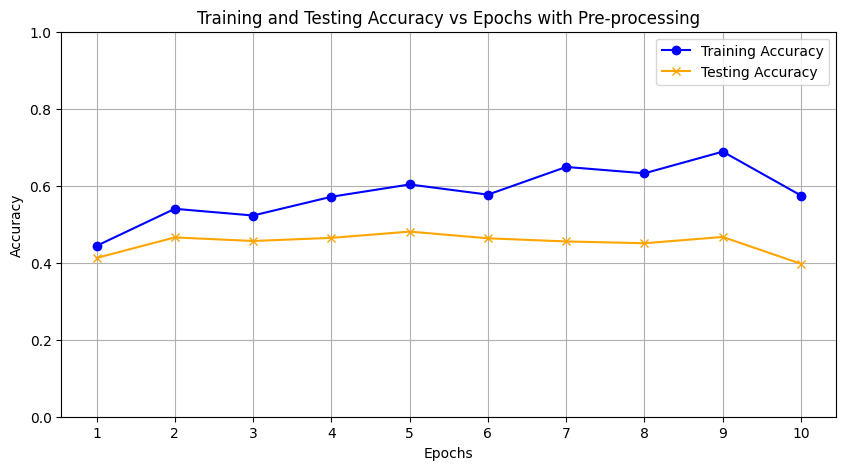

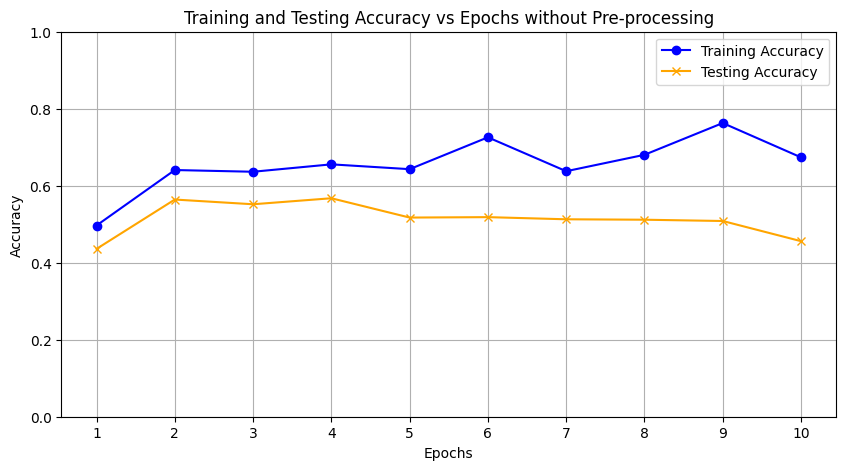

In [29]:

def plot_accuracy(train, test, num_epochs, title):
    epochs = list(range(1, num_epochs + 1))

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train, label='Training Accuracy', marker='o', color='blue')  # Fix here
    plt.plot(epochs, test, label='Testing Accuracy', marker='x', color='orange')

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(epochs)
    plt.ylim(0, 1)  
    plt.grid()
    plt.legend()
    plt.show()

plot_accuracy(train_set_scores, test_set_scores, num_epochs, 'Training and Testing Accuracy vs Epochs with Pre-processing')
plot_accuracy(train_set_scores_all, test_set_scores_all, num_epochs, 'Training and Testing Accuracy vs Epochs without Pre-processing')

In [30]:
CNN = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
    nn.Linear(32 * 25 * 25, 1000),  # Flattened output size for fully connected layer
    nn.Linear(HIDDEN_LAYER, OUTPUT_LAYER),
    nn.Linear(OUTPUT_LAYER, 3) 
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [31]:
# Function to train the model
def train(model, train_loader, criterion, optimizer, device):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    return running_loss / len(train_loader)


In [32]:
num_epochs = 10

for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_accuracy = evaluate(model, test_loader)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Test Accuracy: {test_accuracy*100:.2f}%')


RuntimeError: mat1 and mat2 shapes cannot be multiplied (102400x50 and 20000x1000)

In [15]:
# torch.save(model.state_dict(), 'cnn_model.pth')